Primeras filas del dataframe:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  


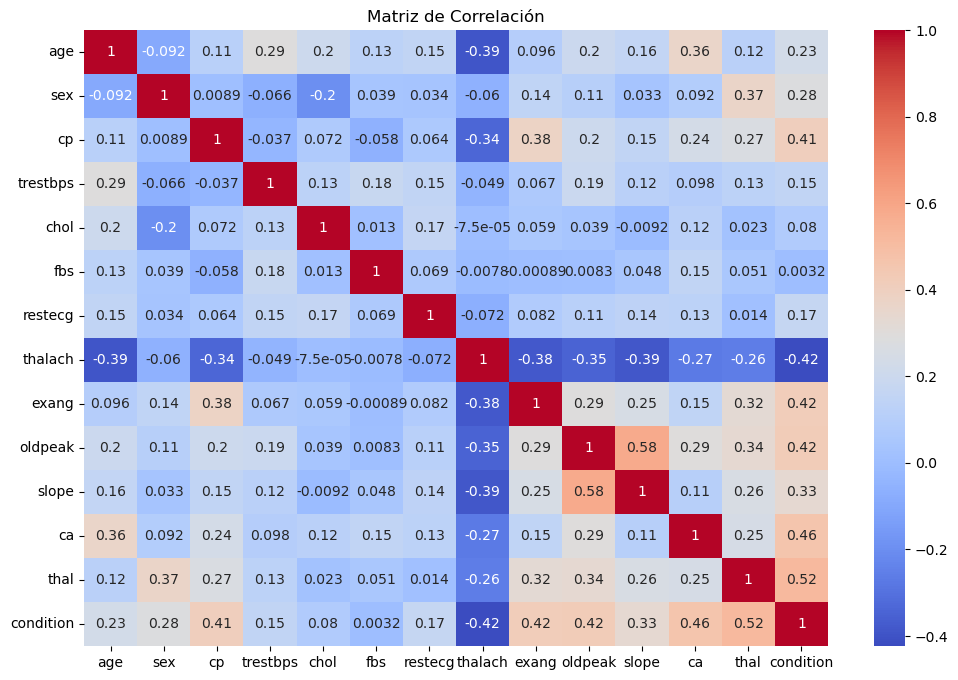

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = r'C:\Users\SM ZONA GAMER\Documents\UNAD\Heart\heart_cleveland_upload.csv'  # Cambia esto si el nombre del archivo es diferente
df = pd.read_csv(file_path)

# Primeras filas del dataframe
print("Primeras filas del dataframe:")
print(df.head())

# Información del dataframe
print("\nInformación del dataframe:")
print(df.info())

# Estadísticas descriptivas del dataframe
print("\nEstadísticas descriptivas del dataframe:")
print(df.describe())

# Valores faltantes en cada columna
print("\nValores faltantes en cada columna:")
print(df.isnull().sum())

# Correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [3]:
# Paso 2: Preprocesar los datos
# Verificar si hay valores faltantes
print(df.isnull().sum())

# Si hay valores faltantes, podrías decidir eliminarlos o rellenarlos. Aquí eliminamos filas con valores faltantes.
df = df.dropna()

# Convertir columnas categóricas en variables dummy (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Verificar la transformación
print("\nDataFrame después de preprocesar:")
print(df.head())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

DataFrame después de preprocesar:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [15]:
# Paso 3: Seleccionar características relevantes
X = df.drop('condition', axis=1)  # Características
y = df['condition']  # Objetivo



In [17]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")


Tamaño del conjunto de entrenamiento: 237
Tamaño del conjunto de prueba: 60


In [19]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)

# Entrenar el modelo
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Evaluar el desempeño
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precisión: {accuracy:.2f}")
print("Reporte de Clasificación:\n", report)
print("Matriz de Confusión:\n", conf_matrix)


Precisión: 0.92
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60

Matriz de Confusión:
 [[32  0]
 [ 5 23]]


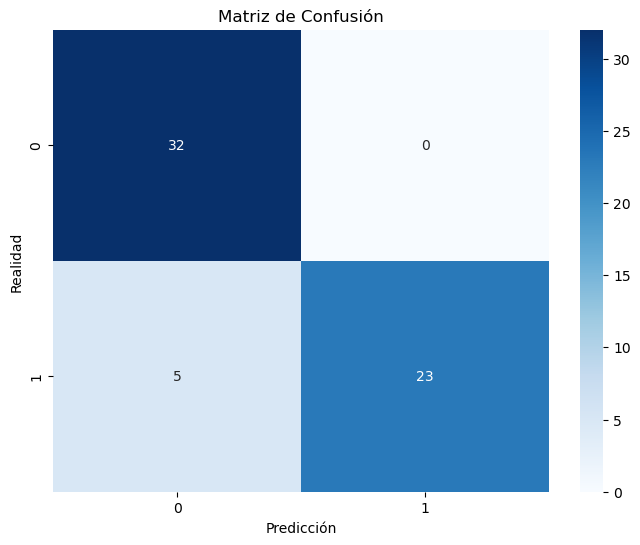

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


In [25]:
# Análisis de resultados
print("Análisis de resultados:")
print(f"Precisión del modelo: {accuracy:.2f}")

# Clasificación detallada
print("Clasificación detallada:")
print(report)

# Análisis de la matriz de confusión
TP = conf_matrix[1, 1]  # Verdaderos positivos
TN = conf_matrix[0, 0]  # Verdaderos negativos
FP = conf_matrix[0, 1]  # Falsos positivos
FN = conf_matrix[1, 0]  # Falsos negativos

# Cálculo de métricas adicionales
sensitivity = TP / (TP + FN)  # Recall o sensibilidad
specificity = TN / (TN + FP)   # Especificidad
f1_score = 2 * (TP / (TP + FP) * TP / (TP + FN)) / (TP / (TP + FP) + TP / (TP + FN))

print(f"\nMétricas adicionales:")
print(f"Sensibilidad (Recall): {sensitivity:.2f}")
print(f"Especificidad: {specificity:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# Conclusiones
if accuracy > 0.75:
    print("\nEl modelo tiene un buen rendimiento y puede ser útil para predecir enfermedades del corazón.")
else:
    print("\nEl modelo podría necesitar ajustes o considerar otros algoritmos para mejorar su rendimiento.")


Análisis de resultados:
Precisión del modelo: 0.92
Clasificación detallada:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60


Métricas adicionales:
Sensibilidad (Recall): 0.82
Especificidad: 1.00
F1 Score: 0.90

El modelo tiene un buen rendimiento y puede ser útil para predecir enfermedades del corazón.
